## Q1: Variance Explained by PCA

In [2]:
import numpy as np

# Given S matrix from Singular Value Decomposition
S = np.array([
    [14.14, 0, 0, 0, 0],
    [0, 11.41, 0, 0, 0],
    [0, 0, 9.46, 0, 0],
    [0, 0, 0, 4.19, 0],
    [0, 0, 0, 0, 0.17]
])

# Calculate total variance and cumulative variance explained
total_variance = np.sum(S**2)
variance_explained = np.cumsum(S.diagonal()**2) / total_variance

# Print statements to decide which option is correct
print("Variance explained by the first principal component:", variance_explained[0])
print("Variance explained by the first two principal components:", variance_explained[1])
print("Variance explained by the first three principal components:", variance_explained[2])
print("Variance explained by the first four principal components:", variance_explained[3])
print("Variance explained by the last four principal components:", 1 - variance_explained[0])

Variance explained by the first principal component: 0.45731389192649746
Variance explained by the first two principal components: 0.7550879531605703
Variance explained by the first three principal components: 0.9597785291681713
Variance explained by the first four principal components: 0.9999338981798668
Variance explained by the last four principal components: 0.5426861080735026


## Dendogram cutoff - Jaccard similarity

In [4]:
# Define a function to calculate the Jaccard similarity
def calculate_jaccard_similarity(ground_truth, predicted):
    N = len(ground_truth)
    true_positives = 0
    true_negatives = 0
    
    # Compare each pair of observations
    for i in range(N):
        for j in range(i + 1, N):
            if ground_truth[i] == ground_truth[j] and predicted[i] == predicted[j]:
                true_positives += 1
            elif ground_truth[i] != ground_truth[j] and predicted[i] != predicted[j]:
                true_negatives += 1

    # Calculate the Jaccard index
    jaccard_index = true_positives / (N * (N - 1) / 2 - true_negatives)
    return jaccard_index

# Ground truth clustering Z based on colors in Table 2
ground_truth = [0, 0, 1, 1, 1, 2, 2, 2, 2, 2]

# Predicted clustering Q based on dendrogram
predicted = [0, 0, 2, 0, 0, 0, 0, 2, 2, 1]

# Now we calculate the Jaccard similarity index
jaccard_similarity = calculate_jaccard_similarity(ground_truth, predicted)
print(f"Jaccard similarity: {jaccard_similarity:.3f}")

# Predicted clustering Q (based on the cutoff in the dendrogram)
# This needs to be determined from the dendrogram. 
# Cluster 1: would include the observations directly connected below the first intersected line, and so on for the other clusters.
# Cluster 2: would be determined by the next vertical line intersected by the cut-off.
# Cluster 3: would be the remaining observations connected below the last intersected line.
# Assuming we have the following clusters:
# Cluster 1: o1, o4
# Cluster 2: o2, o5, o6, o7, o10
# Cluster 3: o3, o8, o9

Jaccard similarity: 0.143


## Classification Error : Impurity gain calculation : Hunt's method
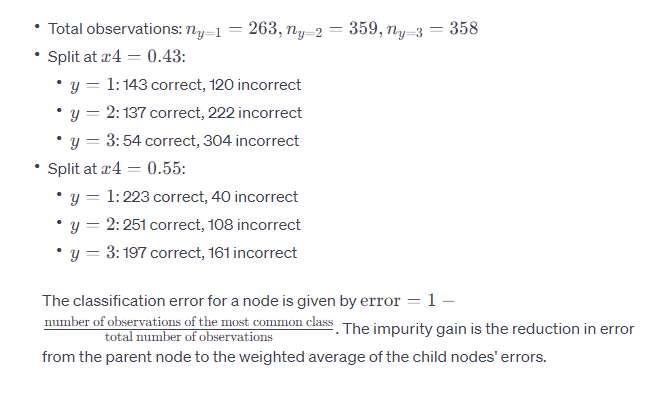
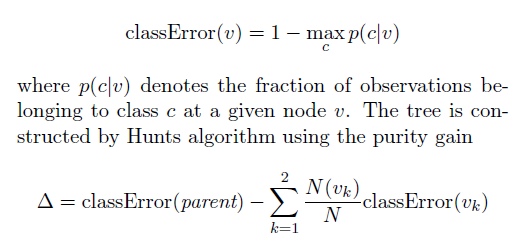

In [6]:
# Number of observations for each class
n_y1 = 263
n_y2 = 359
n_y3 = 358
total_observations = n_y1 + n_y2 + n_y3

# Observations for each class for the split at x4 = 0.43
correct_043_y1, incorrect_043_y1 = 143, 120
correct_043_y2, incorrect_043_y2 = 137, 222
correct_043_y3, incorrect_043_y3 = 54, 304

# Observations for each class for the split at x4 = 0.55
correct_055_y1, incorrect_055_y1 = 223, 40
correct_055_y2, incorrect_055_y2 = 251, 108
correct_055_y3, incorrect_055_y3 = 197, 161

# Function to calculate classification error
def classification_error(correct, incorrect):
    total = correct + incorrect
    error = 1 - max(correct, incorrect) / total if total != 0 else 0
    return error

# Classification error for the parent node (before any split)
parent_error = 1 - max(n_y1, n_y2, n_y3) / total_observations

# Error for split at x4 = 0.43
error_043_left = 1 - max(correct_043_y1, correct_043_y2, correct_043_y3) / (correct_043_y1 + correct_043_y2 + correct_043_y3)
error_043_right = 1 - max(incorrect_043_y1, incorrect_043_y2, incorrect_043_y3) / (incorrect_043_y1 + incorrect_043_y2 + incorrect_043_y3)
weighted_error_043 = (error_043_left * (correct_043_y1 + correct_043_y2 + correct_043_y3) + 
                      error_043_right * (incorrect_043_y1 + incorrect_043_y2 + incorrect_043_y3)) / total_observations

# Error for split at x4 = 0.55
error_055_left = 1 - max(correct_055_y1, correct_055_y2, correct_055_y3) / (correct_055_y1 + correct_055_y2 + correct_055_y3)
error_055_right = 1 - max(incorrect_055_y1, incorrect_055_y2, incorrect_055_y3) / (incorrect_055_y1 + incorrect_055_y2 + incorrect_055_y3)
weighted_error_055 = (error_055_left * (correct_055_y1 + correct_055_y2 + correct_055_y3) + 
                      error_055_right * (incorrect_055_y1 + incorrect_055_y2 + incorrect_055_y3)) / total_observations

# Impurity gain for each split
impurity_gain_043 = parent_error - weighted_error_043
impurity_gain_055 = parent_error - weighted_error_055

impurity_gain_043, impurity_gain_055



(0.0897959183673469, 0.05408163265306121)

## Accuracy calculation from split

In [7]:
# Matrix R as provided
R_solution = np.array([[223, 40], [251, 108], [197, 161]])

# Total number of observations
N_solution = np.sum(R_solution)

# Number of observations in the largest class for each split
n1_solution = np.max(R_solution[:, 0])  # Largest class in the first split
n2_solution = np.max(R_solution[:, 1])  # Largest class in the second split

# Calculating accuracy
accuracy_solution = (n1_solution + n2_solution) / N_solution
accuracy_solution



0.4204081632653061

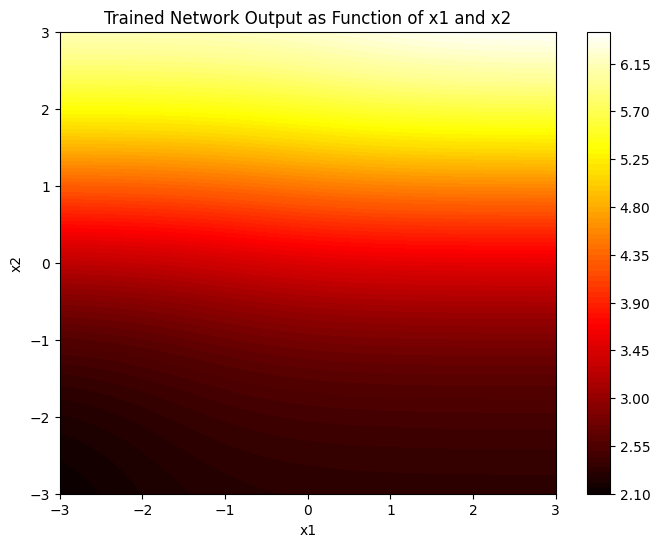

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define the logistic (sigmoid) function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the linear activation function
def linear(a):
     return a

# Given weights for the neural network
w1_1 = np.array([-1.2, -1.3, 0.6])
w1_2 = np.array([-1, 0, 0.9])
w2_0 = 2.2
w2 = np.array([-0.3, 5])  # Corrected to a single array

# Function to compute the output of the ANN based on the weights and inputs
def neural_network_output(x1, x2):
    # Input layer to hidden layer
    z1 = sigmoid(w1_1[0] + w1_1[1]*x1 + w1_1[2]*x2)
    z2 = sigmoid(w1_2[0] + w1_2[1]*x1 + w1_2[2]*x2)
    
    # Hidden layer to output layer
    z3 = w2_0 + (w2[0] * z1) + (w2[1] * z2)  # Corrected to use the single array
    output = linear(z3)
    return output

# Generate a grid of x1 and x2 values
x1_values = np.linspace(-3, 3, 100)
x2_values = np.linspace(-3, 3, 100)
x1_grid, x2_grid = np.meshgrid(x1_values, x2_values)

# Compute the network output for each combination of x1 and x2
output_grid = np.zeros_like(x1_grid)
for i in range(x1_grid.shape[0]):
    for j in range(x1_grid.shape[1]):
        output_grid[i, j] = neural_network_output(x1_grid[i, j], x2_grid[i, j])

# Plot the output grid as a heatmap
plt.figure(figsize=(8, 6))
plt.contourf(x1_grid, x2_grid, output_grid, levels=100, cmap='hot')
plt.colorbar()
plt.title('Trained Network Output as Function of x1 and x2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


# Q11: Weight calculation: Logistic Regression
- Logit function 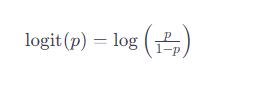

In [13]:
import numpy as np

# The point to classify
b = np.array([1, -0.0, -1.0])  # Including the bias term as the first element

# Weights given in the options
weights_options = {
    'A': (np.array([-0.77, -5.54, 0.01]), np.array([0.26, -2.09, -0.03])),
    'B': (np.array([0.51, 1.65, 0.01]), np.array([0.1, 3.8, 0.04])),
    'C': (np.array([-0.9, -4.39, -0.0]), np.array([-0.09, -2.45, -0.04])),
    'D': (np.array([-1.22, -9.88, -0.01]), np.array([-0.28, -2.9, -0.01]))
}

# For each option, calculate the logits and predict the class
predictions = {}
for option, (w1, w2) in weights_options.items():
    y1 = np.dot(b, w1)
    y2 = np.dot(b, w2)
    y3 = 0  # Since the weights for class 3 are not provided, we assume a weight vector of zeros.
    # The predicted class is the one with the maximum logit
    predicted_class = np.argmax([y1, y2, y3]) + 1  # Adding 1 to match class numbering starting at 1
    predictions[option] = predicted_class

predictions


{'A': 2, 'B': 1, 'C': 3, 'D': 3}

## Find K-mean cluster centers centroids

In [3]:
from sklearn.cluster import KMeans
import numpy as np

# Given data
X = np.array([1.0, 1.2, 1.8, 2.3, 2.6, 3.4, 4.0, 4.1, 4.2, 4.6]).reshape(-1, 1)
initial_centers = np.array([1.8, 3.3, 3.6]).reshape(-1, 1)

# K-Means algorithm with K=3, initialized with given cluster centers
kmeans = KMeans(n_clusters=3, init=initial_centers, n_init=1, max_iter=4, random_state=42)
kmeans.fit(X)

# The location of the cluster centers after convergence
converged_centers = kmeans.cluster_centers_
converged_centers.flatten()  # Flatten the array for easier comparison with the given options



array([1.33333333, 2.76666667, 4.225     ])

## Naive Bayes probability calculation
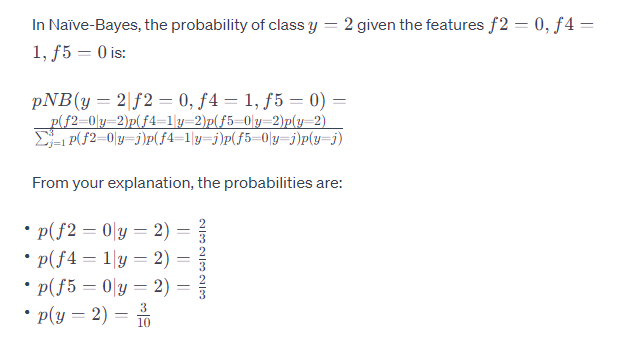
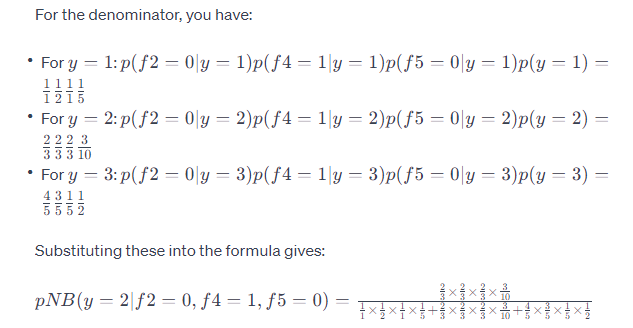

In [19]:
import numpy as np

# Given the binarized data
binarized_data = np.array([
    [0, 0, 0, 1, 0, 0, 0, 0, 0],  # Class C1 (Poor rating)
    [0, 0, 0, 0, 0, 0, 0, 0, 1],  # Class C1 (Poor rating)
    [0, 1, 1, 1, 1, 1, 0, 0, 0],  # Class C2 (Average rating)
    [1, 0, 0, 0, 0, 0, 0, 0, 0],  # Class C2 (Average rating)
    [1, 0, 0, 1, 0, 0, 0, 0, 0],  # Class C2 (Average rating)
    [0, 0, 1, 1, 0, 0, 0, 1, 0],  # Class C3 (High rating)
    [0, 0, 1, 1, 1, 0, 0, 0, 0],  # Class C3 (High rating)
    [0, 0, 0, 0, 1, 0, 0, 0, 0],  # Class C3 (High rating)
    [0, 1, 1, 0, 1, 0, 0, 0, 0],  # Class C3 (High rating)
    [0, 0, 1, 1, 1, 0, 1, 0, 0]   # Class C3 (High rating)
])

# Defining the class labels
class_labels = np.array([1, 1, 2, 2, 2, 3, 3, 3, 3, 3])  # 1 for C1 (Poor), 2 for C2 (Average), 3 for C3 (High)

# Defining the prior probability of having average rating (C2)
P_C2 = np.sum(class_labels == 2) / len(class_labels)

# Calculating the probabilities for the Naive Bayes classifier
# Probability of f2 = 0 given C2
P_f2_0_given_C2 = np.mean(binarized_data[class_labels == 2, 1] == 0)
# Probability of f4 = 1 given C2
P_f4_1_given_C2 = np.mean(binarized_data[class_labels == 2, 3] == 1)
# Probability of f5 = 0 given C2
P_f5_0_given_C2 = np.mean(binarized_data[class_labels == 2, 4] == 0)

# Calculate the likelihood for C2
likelihood_C2 = P_f2_0_given_C2 * P_f4_1_given_C2 * P_f5_0_given_C2

# Calculate the evidence (the denominator in Bayes' theorem)
# Sum over all classes
evidence = 0
for c in [1, 2, 3]:
    P_f2_0_given_c = np.mean(binarized_data[class_labels == c, 1] == 0)
    P_f4_1_given_c = np.mean(binarized_data[class_labels == c, 3] == 1)
    P_f5_0_given_c = np.mean(binarized_data[class_labels == c, 4] == 0)
    P_c = np.sum(class_labels == c) / len(class_labels)
    evidence += P_f2_0_given_c * P_f4_1_given_c * P_f5_0_given_c * P_c

# Finally, calculate the probability of being C2 (average rating) given the features
P_C2_given_features = (likelihood_C2 * P_C2) / evidence

P_C2_given_features



(0.37523452157598497, 0.3)

## Q: Support calculation for ALL features

In [20]:
from itertools import combinations

# Given data
binarized_data = np.array([
    [0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 1, 1, 1, 1, 1, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 0, 0, 0, 1, 0],
    [0, 0, 1, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 1, 1, 0, 1, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 1, 0, 0]
])

N, M = binarized_data.shape  # Number of transactions (N) and items (M)

# Support threshold
support_threshold = 0.15

# Function to calculate the support of an itemset
def calculate_support(itemset, data):
    relevant_transactions = data[:, itemset]
    if len(itemset) == 1:
        # For single itemsets, support is the fraction of transactions that contain the item
        return np.sum(relevant_transactions) / N
    else:
        # For larger itemsets, support is the fraction of transactions that contain all items
        return np.sum(np.all(relevant_transactions, axis=1)) / N

# Finding itemsets with support greater than the threshold
itemsets_with_support = []

# Check all possible non-empty itemsets
for k in range(1, M + 1):  # From single items to all items
    for itemset in combinations(range(M), k):
        support = calculate_support(itemset, binarized_data)
        if support > support_threshold:
            itemsets_with_support.append(itemset)

# Display the itemsets
itemsets_with_support



[(0,),
 (1,),
 (2,),
 (3,),
 (4,),
 (1, 2),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4),
 (1, 2, 4),
 (2, 3, 4)]

In [23]:
# Given data
transactions = np.array([
    [0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 1, 1, 1, 1, 1, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 0, 0, 0, 1, 0],
    [0, 0, 1, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 1, 1, 0, 1, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 1, 0, 0]
])

# Count the support for the antecedent (f2)
support_antecedent = sum(1 for transaction in transactions if transaction[1] == 1)

# Count the support for the entire rule (f3, f4, f5, and f6)
support_whole_rule = sum(1 for transaction in transactions if transaction[2] == 1 and transaction[3] == 1 and transaction[4] == 1 and transaction[5] == 1)

# Calculating the confidence
confidence = support_whole_rule / support_antecedent if support_antecedent != 0 else 0
support_antecedent, support_whole_rule, confidence

(2, 1, 0.5)

## Apriori Algorithm - Find frequent itemsets (L) and Candidate itemsets (C) for a k, e value
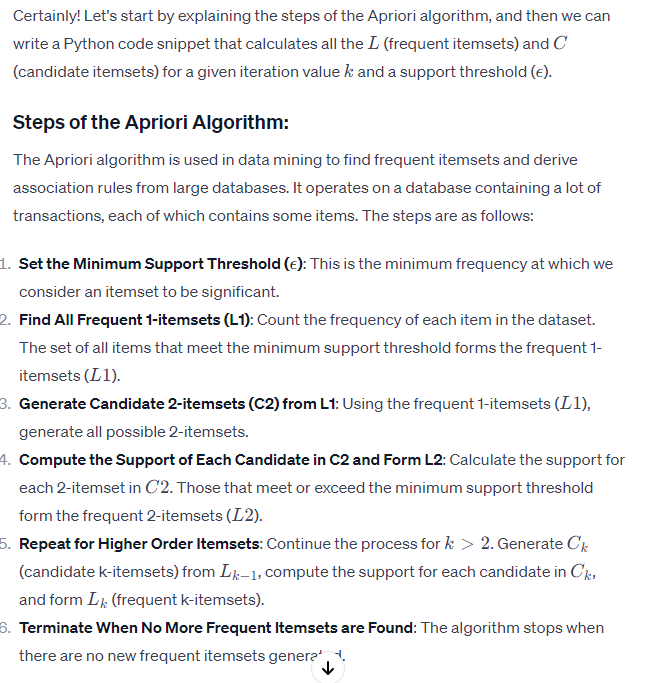

## Q: Apriori Algorithm : Frequent (L) and Candidate (C) itemsets, binary matrices, and support

In [39]:
import numpy as np

binarized_data = np.array([
    [0, 0, 0, 1],
    [0, 0, 0, 0],
    [0, 1, 1, 1],
    [1, 0, 0, 0],
    [1, 0, 0, 1],
    [0, 0, 1, 1],
    [0, 0, 1, 1],
    [0, 0, 0, 0],
    [0, 1, 1, 0],
    [0, 0, 1, 1]
])

def generate_candidates_Lk(previous_level):
    """Generate candidate itemsets of size k from frequent itemsets of size k-1."""
    candidates = set()
    for itemset1 in previous_level:
        for itemset2 in previous_level:
            union_set = frozenset(itemset1.union(itemset2))
            if len(union_set) == len(itemset1) + 1:
                candidates.add(union_set)
    return candidates

def calculate_support(itemset, data):
    """Calculate the support of an itemset."""
    return np.mean(np.all(data[:, list(itemset)], axis=1))

def itemsets_to_binary_matrix(itemsets, num_items):
    """Convert a set of itemsets to a binary matrix."""
    binary_matrix = np.zeros((len(itemsets), num_items), dtype=int)
    for i, itemset in enumerate(itemsets):
        for item in itemset:
            binary_matrix[i, item] = 1
    return binary_matrix

def calculate_supports_for_itemsets(itemsets, data):
    """Calculate the supports for a set of itemsets."""
    supports = {}
    for itemset in itemsets:
        support = calculate_support(itemset, data)
        supports[itemset] = support
    return supports

def apriori_steps(data, min_support, max_k):
    """Apriori algorithm with detailed steps (L and C for each k)."""
    num_items = data.shape[1]

    # L1 and C1
    C1 = [frozenset({i}) for i in range(num_items)]
    L1 = {itemset for itemset in C1 if calculate_support(itemset, data) >= min_support}

    # Store all L and C
    all_L = [L1]
    all_C = [C1]

    for k in range(2, max_k + 1):
        # Generate Ck from Lk-1
        Ck = generate_candidates_Lk(all_L[-1])
        if not Ck:  # If no candidates generated, add empty sets and continue
            all_C.append(set())
            all_L.append(set())
            continue

        all_C.append(Ck)
        
        # Generate Lk from Ck
        Lk = {itemset for itemset in Ck if calculate_support(itemset, data) >= min_support}
        all_L.append(Lk)

        if not Lk:  # If no frequent itemset found, continue with empty sets for subsequent levels
            for j in range(k + 1, max_k + 1):
                all_L.append(set())
                all_C.append(set())

    return all_L, all_C

# Running the Apriori algorithm
epsilon = 0.35  # Support threshold
max_k = 2  # Maximum size of itemsets
all_L, all_C = apriori_steps(binarized_data, epsilon, max_k)

# Calculate supports for L and C
supports_L = [calculate_supports_for_itemsets(Lk, binarized_data) for Lk in all_L]
supports_C = [calculate_supports_for_itemsets(Ck, binarized_data) for Ck in all_C if Ck]  # Calculate for non-empty Ck

# Displaying L, C, and their supports
for k in range(1, max_k + 1):
    print(f"L{k} and its support:")
    for itemset, support in supports_L[k-1].items():
        print(f"Itemset: {itemset}, Support: {support}")
    print()

    print(f"C{k}' and its support:")
    if k < max_k and all_C[k]:
        for itemset, support in supports_C[k-1].items():
            print(f"Itemset: {itemset}, Support: {support}")
    print()

# # Displaying L and C for each k
# for k in range(1, max_k + 1):
#     print(f"L{k}: {all_L[k-1]}")
#     print(f"C{k}': {all_C[k-1]}")
#     if k < max_k:
#         print(f"C{k}: {all_C[k]}")
#     print()

# Number of items in the dataset
num_items = binarized_data.shape[1]

# Convert all L and C to binary matrices
binary_matrices_L = [itemsets_to_binary_matrix(Lk, num_items) for Lk in all_L]
binary_matrices_C = [itemsets_to_binary_matrix(Ck, num_items) for Ck in all_C]

# Displaying the binary matrices for L and C
for k in range(1, max_k + 1):
    print(f"Binary Matrix for L{k}:")
    print(binary_matrices_L[k-1])
    if k < max_k:
        print(f"Binary Matrix for C{k}':")
        print(binary_matrices_C[k-1])
    print()

L1 and its support:
Itemset: frozenset({3}), Support: 0.6
Itemset: frozenset({2}), Support: 0.5

C1' and its support:
Itemset: frozenset({0}), Support: 0.2
Itemset: frozenset({1}), Support: 0.2
Itemset: frozenset({2}), Support: 0.5
Itemset: frozenset({3}), Support: 0.6

L2 and its support:
Itemset: frozenset({2, 3}), Support: 0.4

C2' and its support:

Binary Matrix for L1:
[[0 0 0 1]
 [0 0 1 0]]
Binary Matrix for C1':
[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]

Binary Matrix for L2:
[[0 0 1 1]]



## Apriori Algorithm: Calculation of C1', C1 from L1

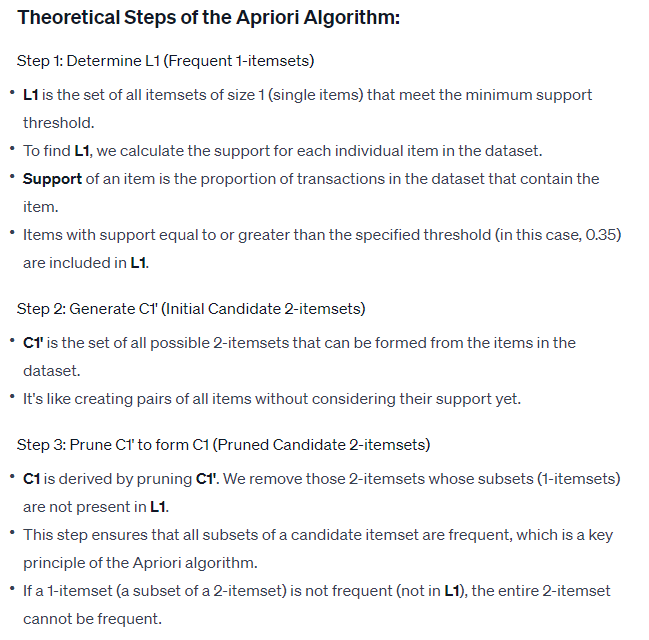
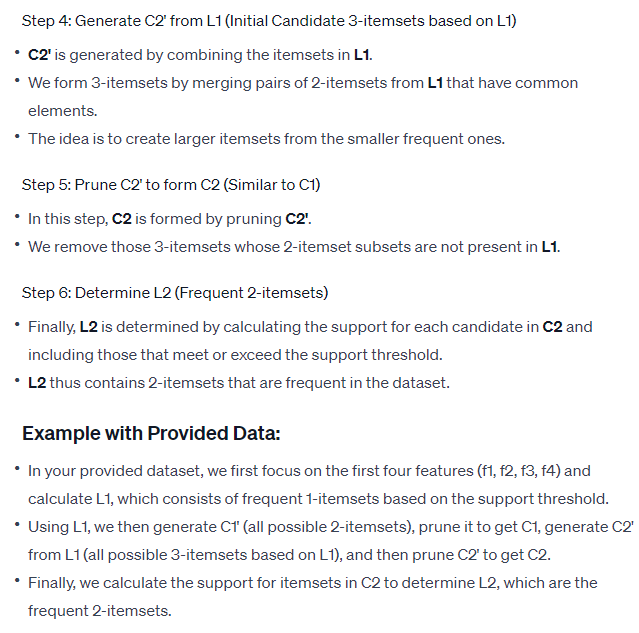

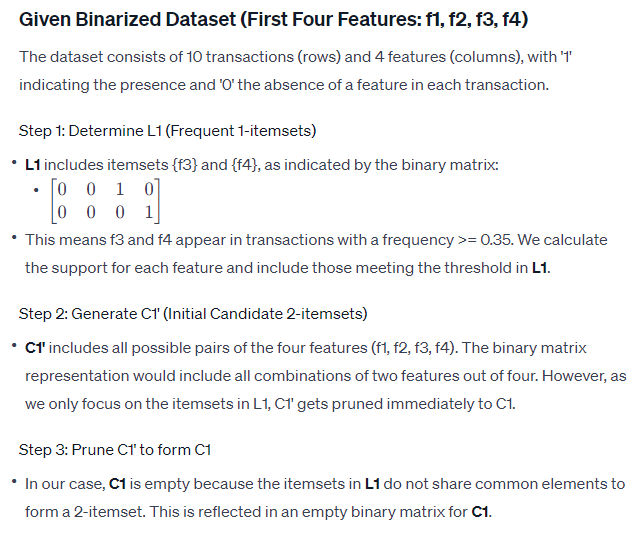
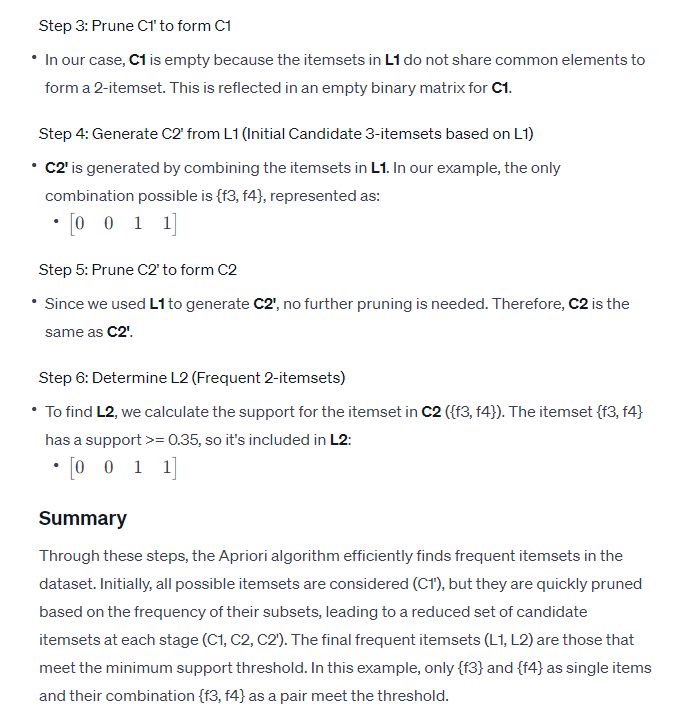

In [41]:
import numpy as np
from itertools import combinations

def generate_initial_candidates(num_items):
    """Generate initial candidate 1-itemsets (C1')."""
    return [frozenset({i}) for i in range(num_items)]

def binary_matrix_to_itemsets(binary_matrix):
    """Convert a binary matrix to a set of itemsets."""
    itemsets = []
    for row in binary_matrix:
        itemset = frozenset(np.where(row == 1)[0])
        itemsets.append(itemset)
    return itemsets


def prune_candidates(candidates, Lk_minus_1):
    """Prune candidate k-itemsets based on Lk-1 (frequent (k-1)-itemsets)."""
    pruned_candidates = []
    for candidate in candidates:
        # Check if all subsets of the candidate are in Lk_minus_1
        all_subsets_frequent = all(frozenset(subset) in Lk_minus_1 for subset in combinations(candidate, len(candidate) - 1))
        if all_subsets_frequent:
            pruned_candidates.append(candidate)
    return pruned_candidates

def calculate_L1_from_data(data, min_support):
    """Calculate L1 (frequent 1-itemsets) from the data."""
    num_items = data.shape[1]
    C1 = generate_initial_candidates(num_items)
    L1 = {itemset for itemset in C1 if calculate_support(itemset, data) >= min_support}
    return L1

def calculate_L2_from_C2(C2, data, min_support):
    """Calculate L2 (frequent 2-itemsets) from C2."""
    L2 = {itemset for itemset in C2 if calculate_support(itemset, data) >= min_support}
    return L2
    
# Given binarized data only considering the first four features (f1, f2, f3, f4)
binarized_data_4_features = np.array([
    [0, 0, 0, 1],
    [0, 0, 0, 0],
    [0, 1, 1, 1],
    [1, 0, 0, 0],
    [1, 0, 0, 1],
    [0, 0, 1, 1],
    [0, 0, 1, 1],
    [0, 0, 0, 0],
    [0, 1, 1, 0],
    [0, 0, 1, 1]
])

# Given L1 as a binary matrix
L1_matrix = np.array([
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])

# Convert L1 matrix to itemsets
L1_itemsets = binary_matrix_to_itemsets(L1_matrix)

# Calculate C1' (initial candidate 1-itemsets)
C1_prime = generate_initial_candidates(4)

# Prune C1' to get C1 based on L1
C1 = prune_candidates(C1_prime, L1_itemsets)

# Generate candidate itemsets C2' from L1
C2_prime = generate_candidates_Lk(L1_itemsets)

# Prune C2' to get C2 based on L1 (In this case, C2' is same as C2 because we already used L1 to generate C2')
C2 = C2_prime

# Calculate L2 (frequent 2-itemsets) from C2
L2 = calculate_L2_from_C2(C2, binarized_data_4_features, 0.35)

# Convert C1', C1, C2', C2, and L2 to binary matrices for display
C1_prime_matrix = itemsets_to_binary_matrix(C1_prime, 4)
C1_matrix = itemsets_to_binary_matrix(C1, 4)
C2_prime_matrix = itemsets_to_binary_matrix(C2_prime, 4)
C2_matrix = itemsets_to_binary_matrix(C2, 4)
L2_matrix = itemsets_to_binary_matrix(L2, 4)

C1_prime_matrix, C1_matrix, C2_prime_matrix, C2_matrix, L2_matrix




(array([[1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]]),
 array([], shape=(0, 4), dtype=int32),
 array([[0, 0, 1, 1]]),
 array([[0, 0, 1, 1]]),
 array([[0, 0, 1, 1]]))

# Q: Naive Bayes Probability

In [43]:
# Given probabilities from Table 7
prob_x2_x3_given_y = {
    (0, 0): {1: 0.41, 2: 0.28, 3: 0.15},
    (0, 1): {1: 0.17, 2: 0.28, 3: 0.33},
    (1, 0): {1: 0.33, 2: 0.25, 3: 0.15},
    (1, 1): {1: 0.09, 2: 0.19, 3: 0.37}
}

# Prior probabilities
prior_prob_y = {1: 0.268, 2: 0.366, 3: 0.365}

# Observing ^x2 = 0 and ^x3 = 1
x2 = 0
x3 = 1

# Calculating the probability an observation had poor rating (y = 1)
# Using Bayes' Theorem: P(y|x2, x3) = P(x2, x3|y) * P(y) / P(x2, x3) for all y =1,2,3
# Calculate denominator P(x2, x3) = sum over all y [P(x2, x3|y) * P(y)]
prob_x2_x3 = sum(prob_x2_x3_given_y[(x2, x3)][y] * prior_prob_y[y] for y in prior_prob_y)

# Calculate numerator P(x2, x3|y = 1) * P(y = 1)
numerator = prob_x2_x3_given_y[(x2, x3)][1] * prior_prob_y[1]

# Calculate posterior probability P(y = 1|x2 = 0, x3 = 1)
prob_y1_given_x2_x3 = numerator / prob_x2_x3

prob_y1_given_x2_x3



0.1696897463592685

# 1D Gaussian Mixed Model : Probability of an observation 

In [44]:
from scipy.stats import norm

# Given parameters
w = [0.19, 0.34, 0.48]  # Mixture weights
mu = [3.177, 3.181, 3.184]  # Means of the Gaussians
sigma = [0.0062, 0.0076, 0.0075]  # Standard deviations of the Gaussians
x0 = 3.19  # Observation

# Calculate the density of each Gaussian at x0
densities = [norm.pdf(x0, mu[k], sigma[k]) for k in range(3)]

# Calculate the total density
total_density = sum(w[k] * densities[k] for k in range(3))

# Probability of x0 being assigned to cluster k = 2
# P(k = 2 | x0) = (w2 * density of Gaussian 2 at x0) / total density
prob_k2_given_x0 = (w[1] * densities[1]) / total_density

prob_k2_given_x0



0.3079112900604622

## Q24: AdaBoost weight calculation

In [52]:
import numpy as np

# Example data
N_example = 7  # Number of observations
initial_weights_example = np.full(N_example, 1/N_example)  # Equal initial weights
classifier_accuracy_example = 0.28  # Example classifier accuracy
error_rate_example = 1 - classifier_accuracy_example  # Error rate of the classifier

# Calculate the performance weight (alpha)
alpha_example = 0.5 * np.log((1 - error_rate_example) / error_rate_example)

# Update weights for correctly and incorrectly classified observations
# Assuming two observations are correctly classified and two are not
updated_weights_example = np.where(
    [True, True, False, False, False, False, False],  # Correctly classified
    initial_weights_example * np.exp(-alpha_example),  # Correctly classified update
    initial_weights_example * np.exp(alpha_example)   # Incorrectly classified update
)

# Normalize the weights
normalized_weights_example = updated_weights_example / np.sum(updated_weights_example)
normalized_weights_example


array([0.25352113, 0.25352113, 0.09859155, 0.09859155, 0.09859155,
       0.09859155, 0.09859155])

## Q25: Gaussian Kernel Density Estimator : LOO error

In [53]:
from scipy.stats import norm

# Given observations and parameters
observations = np.array([3.918, -6.35, -2.677, -3.003])
sigma = 2  # Given kernel width (standard deviation of the Gaussian kernels)

# Function to compute the kernel density estimate
def kde_loo(observations, left_out_index, bandwidth):
    # Leave one observation out and get the remaining observations
    train_data = np.delete(observations, left_out_index)
    # Evaluate the KDE on the left-out observation
    kde_estimate = np.mean(norm.pdf(observations[left_out_index], train_data, bandwidth))
    return kde_estimate

# Compute the LOO KDE probabilities
loo_probabilities = [kde_loo(observations, i, sigma) for i in range(len(observations))]

# Compute the negative log-likelihood for each left-out observation
neg_log_likelihoods = [-np.log(p) if p > 0 else np.inf for p in loo_probabilities]

# Compute the average negative log-likelihood (LOO error)
loo_error = np.mean(neg_log_likelihoods)

loo_probabilities, loo_error


([0.0004564791507104215,
  0.028704952488396496,
  0.07821583958100119,
  0.0821712002583539],
 4.072471660359569)

## Q26: Correlation using Covariance Matrix
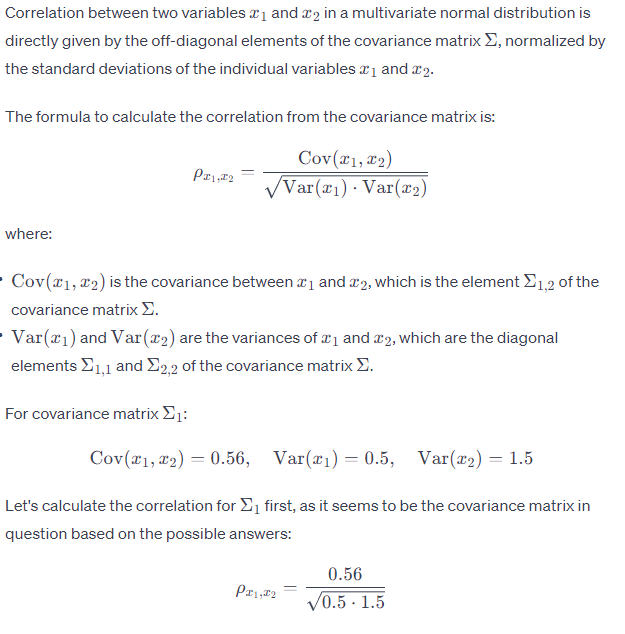

In [54]:
# Given covariance matrix elements for Σ1
cov_x1_x2 = 0.56
var_x1 = 0.5
var_x2 = 1.5

# Calculate the correlation between x1 and x2
correlation_x1_x2 = cov_x1_x2 / (np.sqrt(var_x1) * np.sqrt(var_x2))
correlation_x1_x2


0.6466323014923809

## Q27: GMM Clusters
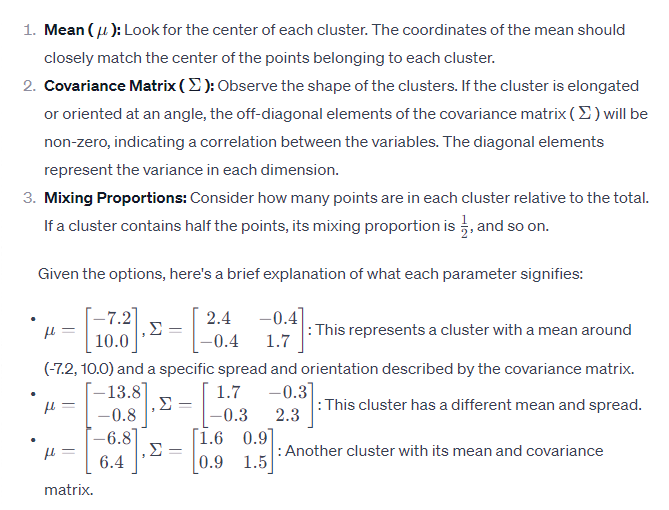
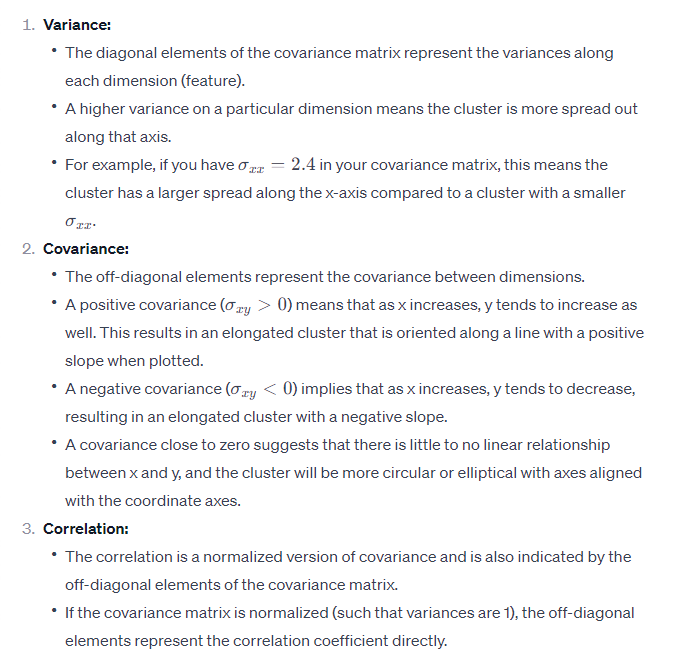